Co ma być na prezentacji: opis tematu, opis problemu, opis matematyki, ciekawy zbiór(to efekt wow), wszyscy muszą coś przedstawić

# TODO: Wybór zbioru danych

Propozycje:

https://www.kaggle.com/datasets/ivivan/real-time-water-quality-data

https://www.kaggle.com/datasets/marcospessotto/happiness-and-alcohol-consumption 

https://www.kaggle.com/datasets/levyedgar44/income-and-happiness-correction

# TODO: Zarys matematyczny

### Regresja parametryczna i nieparametryczna (prezentacja problemu)
Analiza regresji jest techniką statystyczną pozwalająca opisywać związki zachodzące pomiędzy zmiennymi objaśniającymi a objaśnianymi.

Cechą wspólną różnych rodzajów regresji parametrycznej jest to, że musimy znać lub założyć na wstępie jakąś matematyczną zależność wiążącą zmienne wejściowe i wyjściowe. 

Zadanie znalezienia wspomnianej postaci matematycznej nie zawsze jest łatwe do wykonania, a czasami wręcz niewykonalne. W takich sytuacjach warto rozważyć użycie jednej z metod nieparametrycznych, która nie wymaga w żadnym miejscu przyjmowania założeń co do postaci funkcji wiążącej dane wejściowe i wyjściowe.

Często jest również tak, że nawet jeśli użycie metod parametrycznych jest uzasadnione, metody nieparametryczne po prostu łatwiej jest zastosować, gdyż nie trzeba brać pod uwagę specyficznych założeń, głównie dotyczących rozkładu populacji.

Przykładem takiej metody nieparametrycznej jest regresja jądrowa.

#### Regresja jądrowa
Załóżmy że mamy dane dwie jednowymiarowe zmienne losowe X,Y. Uzyskana z nich próba losowa długości n ma postać: $$(x_{1}, y_{1}), ..., (x_{n}, y_{n})$$

Poszukujemy funkcji f, która najlepiej charakteryzowałaby ew. zależność między zmiennymi losowymi X oraz Y. Jej
estymator $\hat m(x)$ wyznacza się tak, aby zminimalizować wyrażenie
$$\sum_{i=1}^{n} [y_{i} - m(x_{i})]^2$$

Zmienne losowe są powiązane ze sobą relacją $y_{i} = m(x_{i})+e_{i}$, gdzie $e_{i}$ to biały szum o pewnych określonych właściwościach statystycznych. Funkcja $m(x)$ opisuje warunkową wartość oczekiwaną zmiennej losowej $Y$ pod warunkiem, że zmienna $X$ przyjęła zadaną wartość $x$, czyli $m(x) = E(Y|X=x)$. W odróżnieniu od metod estymacji parametrycznej, estymator $\hat m(x)$ nie ma postaci funkcji analitycznej a jest po prostu pewną nieznaną funkcją.

Załóżmy, iż chcemy wyznaczyć wartość $\hat m(x)$ biorąc pod uwagę punkty z jego otoczenia $D_{x}=[x-b, x+b], b>0.$ Wówczas $\hat m(x)$ można estymować następującym wyrażeniem: 
$$\hat m(x) = \frac{\sum_{x_{i}D_{x}}y_{i}}{|x_{i} \in D_{x}|} $$
gdzie $|x_{i} \in D_{x}|$ jest liczbą elementów wewnątrz $D_{x}$.

Inaczej $\hat m(x_{t})$ można zapisać w postaci: 
$$\hat m(x_{t}) = \frac{\sum_{i=1}^{n} w_{ix}y_{i}}{\sum_{i=1}^{n} w_{ix}} $$
gdzie $w_{ix} =$ 0 lub 1 zwane jest wagą.

Powyższe równanie jest po prostu średnią ważoną. Dane, którym przypisano większe wagi mają większy udział w określeniu średniej ważonej niż dane, którym przypisano mniejsze wagi.

W praktyce wagi $w_{ix}$ zastępowane są przez funkcją o postaci:
$$w_{ix} = \frac{1}{h}K (\frac{x - x_{i}}{h}) = K(x-x_{i}),$$
gdzie $K(x)$ jest jądrem estymatora i najczęściej przyjmuje postać funkcji gaussowskiej:
$$K(x) = \frac{1}{\sqrt{2\pi}} exp (-\frac{x^2}{2}),$$
natomiast $h$ jest pewnym ustalonym, dodatnim współczynnikiem wygładzenia (ramką, otoczeniem).

Po podstawieniupotrzymujemy podstawową postać estymatora regresji zwanego estymatorem Nadaraya-Watsona
$$\hat m(x_{t}) = \frac{\sum_{i=1}^{n} K (\frac{x - x_{i}}{h})y_{i}}{\sum_{i=1}^{n} K (\frac{x - x_{i}}{h})} = \sum_{i=1}^{n} w_{i}y_{i}$$

Bardzo istotne znaczenie dla kształtu linii regresji ma właściwy dobór współczynnika wygładzania h.

# Water quality (nieciekawa zależność, idk czy wyjdzie coś sensownego)

In [311]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [312]:
data_list = []

for filename in os.listdir('data'):
    f = os.path.join('data', filename)
    if os.path.isfile(f):
        data_ = pd.read_csv('data/Mulgrave_river_deeral_joined.csv')
        data_ = data_[['Conductivity', 'Turbidity']]
        data_list.append(data_)

data = pd.concat(data_list)

data = data[['Conductivity', 'Turbidity']]
data = data[data['Turbidity'] >= 0]
data = data[data['Conductivity'] >= 0]
data = data.drop_duplicates()
data.sample(5)

,Conductivity,Turbidity
17501,6858.92,4.87
15402,2488.39,2.41
26395,3499.77,4.99
27143,29649.34,4.68
11228,55.86,13.33


![Turbility](FTU-NTU_Turbidity.jpg "Source: https://camblab.info/turbidity-standards-quick-reference-guide")

Source: https://camblab.info/turbidity-standards-quick-reference-guide

![Turbility](composite.jpg "Source: https://waterontheweb.org/under/waterquality/turbidity")

Source: https://camblab.info/turbidity-standards-quick-reference-guide

In [313]:
data.describe()

,Conductivity,Turbidity
count,21045.000000,21045.000000
mean,2569.211851,9.805513
std,6096.743084,49.409328
min,0.000000,0.000000
25%,56.820000,2.260000
50%,93.430000,3.470000
75%,1343.460000,6.680000
max,48453.100000,5734.270000


Text(0.5, 1.0, 'Conductivity Histogram')

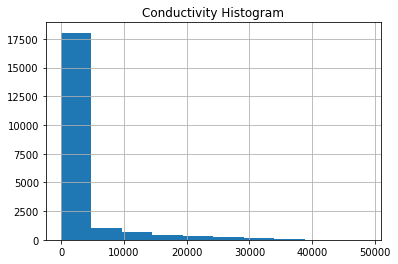

In [314]:
data['Conductivity'].hist()
plt.title('Conductivity Histogram')

Text(0.5, 1.0, 'Turbidity < 20 Histogram')

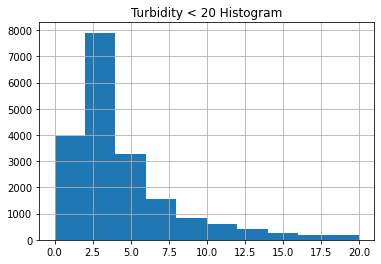

In [315]:
data[data['Turbidity'] < 20]['Turbidity'].hist()
plt.title('Turbidity < 20 Histogram')

In [316]:
print(f"{round(data[data['Turbidity'] < 20].size/data.size * 100)}% danych zbioru ma przejrzystość w zakresie <0;20).")

91% danych zbioru ma przejrzystość w zakresie <0;20).


Text(0.5, 1.0, 'Conductivity / Turbidity')

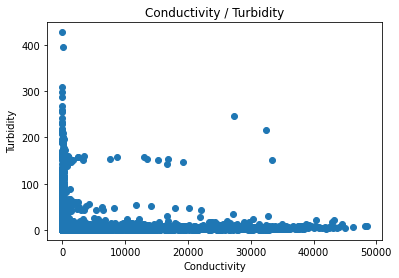

In [317]:
data = data[data['Turbidity'] < 500]
data = data[data['Conductivity'] >= 0]

plt.scatter(data['Conductivity'], data['Turbidity'])
plt.xlabel('Conductivity')
plt.ylabel('Turbidity')
plt.title('Conductivity / Turbidity')

# Happiness and Alcohol (mały zbiór ale ciekawe zależności)

In [318]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [319]:
data = pd.read_csv('data2/HappinessAlcoholConsumption.csv')

data = data[['GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita', 'HappinessScore']]

data.sample(5)

,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,HappinessScore
84,3.694,77,189,8,4.907
52,3.117,167,41,8,5.822
64,4.879,82,97,9,5.510
60,23.541,192,154,113,5.546
95,1.463,58,22,2,4.356


In [320]:
data.describe()

,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,HappinessScore
count,122.000000,122.000000,122.000000,122.000000,122.000000
mean,91.482836,137.565574,96.598361,66.598361,5.524828
std,209.577313,104.817353,81.435028,88.121503,1.148736
min,1.029000,1.000000,1.000000,1.000000,3.069000
25%,4.134250,38.250000,25.500000,5.000000,4.528250
50%,12.016000,125.500000,82.500000,16.000000,5.542000
75%,41.990000,224.750000,142.500000,112.750000,6.477000
max,953.000000,376.000000,373.000000,370.000000,7.526000


<AxesSubplot:>

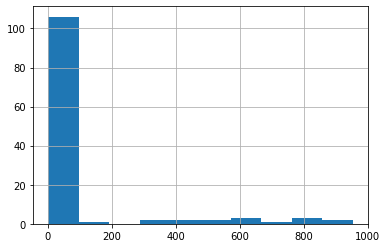

In [321]:
data['GDP_PerCapita'].hist()

<AxesSubplot:>

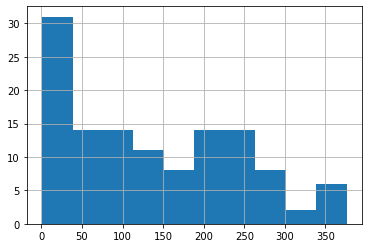

In [322]:
data['Beer_PerCapita'].hist()

<AxesSubplot:>

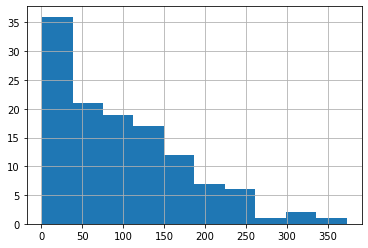

In [323]:
data['Spirit_PerCapita'].hist()

<AxesSubplot:>

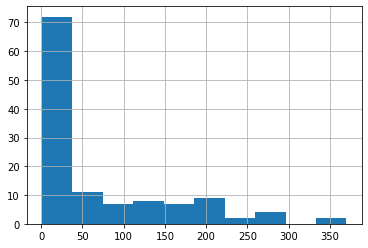

In [324]:
data['Wine_PerCapita'].hist()

<AxesSubplot:>

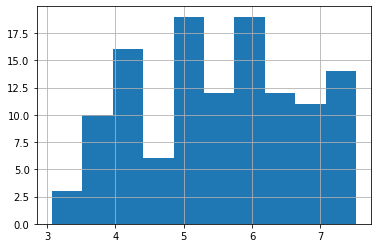

In [325]:
data['HappinessScore'].hist()

Text(0.5, 1.0, 'GDP_PerCapita / HappinessScore')

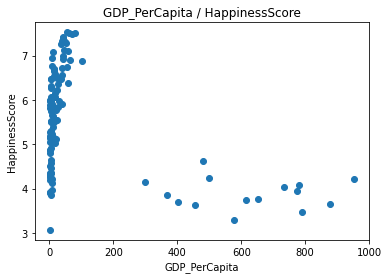

In [326]:
plt.scatter(data['GDP_PerCapita'], data['HappinessScore'])
plt.xlabel('GDP_PerCapita')
plt.ylabel('HappinessScore')
plt.title('GDP_PerCapita / HappinessScore')

# ^Ten wygląda fajnie ale jest jakiś zakłamany

Text(0.5, 1.0, 'Beer_PerCapita / HappinessScore')

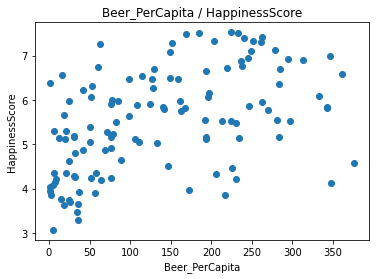

In [327]:
plt.scatter(data['Beer_PerCapita'], data['HappinessScore'])
plt.xlabel('Beer_PerCapita')
plt.ylabel('HappinessScore')
plt.title('Beer_PerCapita / HappinessScore')

Text(0.5, 1.0, 'Spirit_PerCapita / HappinessScore')

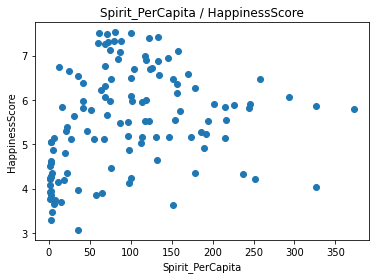

In [328]:
plt.scatter(data['Spirit_PerCapita'], data['HappinessScore'])
plt.xlabel('Spirit_PerCapita')
plt.ylabel('HappinessScore')
plt.title('Spirit_PerCapita / HappinessScore')

# Income / Happiness (mały zbiór, zależności liniowe)

In [329]:
data = pd.read_csv('data3/happyscore_income.csv')
data = data [['GDP', 'avg_income', 'avg_satisfaction', 'income_inequality', 'happyScore']]

data.sample(5)

,GDP,avg_income,avg_satisfaction,income_inequality,happyScore
78,0.35997,1428.120000,5.3,32.840000,4.514
59,0.37545,908.640000,5.2,54.180000,4.898
50,1.27074,14542.800000,6.4,32.110000,5.987
56,0.59066,1491.720000,6.2,37.265000,4.876
87,0.92053,4629.908571,5.6,29.727143,5.123


Text(0.5, 1.0, 'GDP / happyScore')

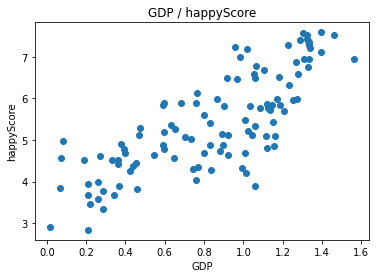

In [330]:
plt.scatter(data['GDP'], data['happyScore'])
plt.xlabel('GDP')
plt.ylabel('happyScore')
plt.title('GDP / happyScore')

Text(0.5, 1.0, 'avg_income / happyScore')

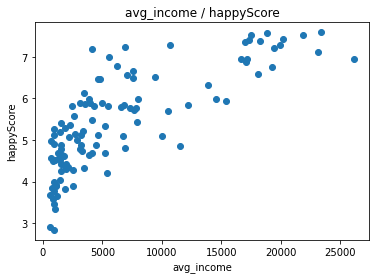

In [331]:
plt.scatter(data['avg_income'], data['happyScore'])
plt.xlabel('avg_income')
plt.ylabel('happyScore')
plt.title('avg_income / happyScore')

Text(0.5, 1.0, 'avg_satisfaction / happyScore')

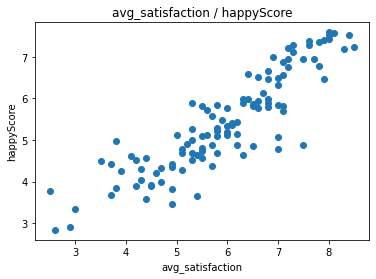

In [332]:
plt.scatter(data['avg_satisfaction'], data['happyScore'])
plt.xlabel('avg_satisfaction')
plt.ylabel('happyScore')
plt.title('avg_satisfaction / happyScore')

Text(0.5, 1.0, 'income_inequality/ happyScore')

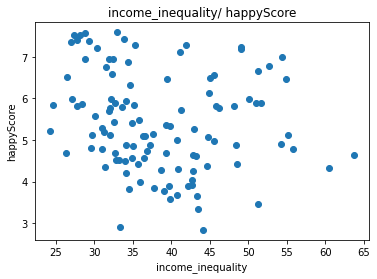

In [333]:
plt.scatter(data['income_inequality'], data['happyScore'])
plt.xlabel('income_inequality')
plt.ylabel('happyScore')
plt.title('income_inequality/ happyScore')

# Zastosowanie.

Regresja jądrowa (Kernel Regression) jest to technika wykorzystywana do estymacji warunkowej wartości oczekiwanej zmiennej losowej. 

Celem jest znalezienie nieliniowej zależności między parą zmiennych X i Y.

E(X |Y = y), jesli Y ma wpływ na wartość X to Y ma wply na średnią wartości z X. Oczekiwana wartość E(X |Y = 2) jest inna niż wartość E(X |Y = 3).

# TODO: Implementacja

# TODO: Prezentacja